## Exploratory data analysis file pre-modelling

- remove outliers

- check for normality and transform if not normal

- consider engineering features


#### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#### read cleaned data frame

In [2]:
df = pd.read_feather('../data/processed/clean_ft_table_labs_strip')

#### Drop features that won't be used in model (i.e. hadm_id and endtime)

In [3]:
df_features = df.copy()

In [4]:
df_features.drop(['hadm_id','endtime'],axis=1,inplace=True)

In [5]:
df_features

,time_on_vent,re_intub_class,gender,admission_type,anchor_age,heartrate,weight,hco3,pulseox,creatinine,bun,height,tidalvolume,temp
0,25.983333,0,F,EW EMER.,72,79.0,123.2,22.0,100.0,2.2,14.0,59.921260,387.0,36.444444
1,17.000000,0,M,EW EMER.,23,122.0,264.0,23.0,96.0,0.7,23.0,70.933071,527.0,39.166667
2,580.233333,0,F,EW EMER.,81,63.0,198.0,26.0,96.0,0.8,29.0,61.905512,437.0,36.833333
3,170.000000,0,F,URGENT,65,80.0,205.9,35.0,100.0,1.0,15.0,61.905512,614.0,37.333333
4,83.866667,0,F,EW EMER.,61,73.0,199.5,26.0,100.0,0.9,23.0,66.070866,556.0,36.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7886,134.333333,1,F,EW EMER.,68,108.0,77.4,26.0,96.0,0.5,13.0,59.921260,320.0,37.611111
7887,14.783333,1,M,EW EMER.,65,75.0,189.2,24.0,100.0,0.9,18.0,70.039370,498.0,37.722222
7888,73.466667,1,F,DIRECT EMER.,65,94.0,139.0,21.0,96.0,2.9,62.0,61.011811,519.0,37.055556
7889,218.083333,1,F,EW EMER.,53,80.0,160.6,34.0,100.0,0.5,13.0,64.086614,308.0,36.888889


#### select continuous features so we can remove outliers

In [6]:
df_continuous = df_features.copy()

In [7]:
df_continuous.drop(['re_intub_class','gender','admission_type'],axis=1,inplace=True)

#### Remove outliers by removing all values with a zscore +/- 4

In [8]:
summary_stats = df_continuous.describe()
summary_stats

,time_on_vent,anchor_age,heartrate,weight,hco3,pulseox,creatinine,bun,height,tidalvolume,temp
count,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000
mean,100.696183,61.803447,85.990622,184.894454,25.170447,97.657838,1.348859,27.772526,66.498932,476.834563,36.988712
std,138.835264,16.557386,17.501060,55.201505,4.878521,3.006840,1.292172,22.191232,5.621192,147.283666,1.724593
min,6.016667,18.000000,0.000000,56.000000,9.000000,0.000000,0.000000,1.000000,0.000000,101.000000,-17.777778
25%,20.333333,52.000000,74.000000,147.800000,22.000000,96.000000,0.700000,13.000000,64.086614,379.500000,36.722222
50%,52.000000,63.000000,85.000000,176.000000,25.000000,98.000000,0.900000,21.000000,66.964567,455.000000,37.000000
75%,127.300000,74.000000,97.000000,212.700000,28.000000,100.000000,1.500000,35.000000,70.039370,550.000000,37.388889
max,2389.733333,91.000000,173.000000,605.000000,50.000000,100.000000,13.600000,276.000000,175.098425,1602.000000,40.000000


In [9]:
cols = list(df_continuous.columns)
df_new = df_continuous.copy()
for col in cols:
    df_new[col] = (df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()

In [ ]:
# Set any value which has a z-score +/- 4 to NaN
for col in cols:
    df_continuous[col] = np.where(((df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()>4)|
                                  ((df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()<-4),
                                  np.NaN,df_continuous[col])

In [11]:
df_continuous.isnull().sum()

time_on_vent     76
anchor_age        0
heartrate        13
weight           40
hco3              9
pulseox          23
creatinine      102
bun              64
height           36
tidalvolume      16
temp             15
dtype: int64

#### Drop samples containing NaNs

In [12]:
df_continuous.dropna(inplace=True)

#### Test for normality 

<AxesSubplot:xlabel='pulseox', ylabel='Count'>

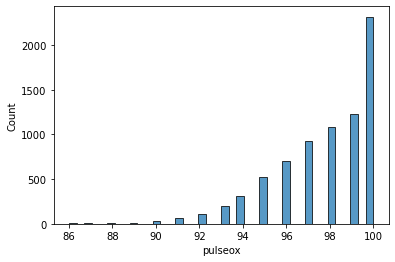

In [27]:
sns.histplot(df_continuous['pulseox'], bins = 40)

In [14]:
from scipy.stats import shapiro, normaltest

In [15]:
df_continuous.apply(normaltest)

,time_on_vent,anchor_age,heartrate,weight,hco3,pulseox,creatinine,bun,height,tidalvolume,temp
0,3199.161579,3.013988e+02,1.815994e+02,9.505320e+02,5.199743e+02,1.239220e+03,3780.933851,2413.728911,7.374064e+01,8.025534e+02,5.220036e+02
1,0.000000,3.565195e-66,3.682931e-40,3.931807e-207,1.227484e-113,8.067701e-270,0.000000,0.000000,9.714585e-17,5.342619e-175,4.450031e-114


In [16]:
df_continuous.apply(shapiro)

/home/anne_717/anaconda3/envs/extumate/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,time_on_vent,anchor_age,heartrate,weight,hco3,pulseox,creatinine,bun,height,tidalvolume,temp
0,0.750575,9.732109e-01,9.907055e-01,9.582782e-01,9.719483e-01,0.865367,0.72496,0.832236,9.856148e-01,9.625439e-01,9.705243e-01
1,0.000000,2.862784e-35,8.216742e-22,6.495018e-42,6.222463e-36,0.000000,0.00000,0.000000,5.949743e-27,3.056246e-40,1.185877e-36


In [17]:
df_categorical = df_features.copy()
df_categorical = df_features[['re_intub_class','gender','admission_type']]

In [18]:
df_tobox = df_continuous.copy()

#### Transform features so each feature is normally distributed

In [20]:
from scipy.stats import boxcox
from sklearn.preprocessing import quantile_transform

In [21]:
df_tobox['bun']= boxcox(df_tobox['bun']+1,0) # need to shift all values as boxcox doesnt work on non-positive or 
zero values
df_tobox['creatinine']= boxcox(df_tobox['creatinine']+1,0)
df_tobox['pulseox']= boxcox(df_tobox['pulseox']+1,0)
df_tobox['anchor_age']= boxcox(df_tobox['anchor_age']+1,0)

In [22]:
#df_tobox = df_tobox.transform(lambda x: boxcox((x + 1),0)) # apply boxcox to entire dataframe

pulseox = df_continuous['pulseox'].values
df_tobox['pulseox'] = quantile_transform(pulseox.reshape(-1,1),
                             n_quantiles=300,
                             output_distribution='normal',
                             copy=True)

pulseox = df_continuous['anchor_age'].values
df_tobox['anchor_age'] = quantile_transform(pulseox.reshape(-1,1),
                             n_quantiles=300,
                             output_distribution='normal',
                             copy=True)

In [23]:
df_to_model = pd.merge(left = df_tobox, right=df_categorical, how = 'inner',left_index = True, right_index = True)

In [25]:
df_to_model.reset_index(inplace=True)
df_to_model.drop('index',axis=1,inplace=True)

#### Check for autocorrelation

<AxesSubplot:>

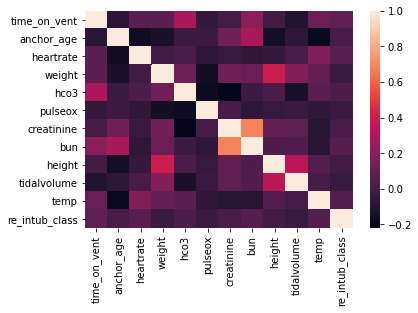

In [26]:
sns.heatmap(df_to_model.corr())

<AxesSubplot:xlabel='pulseox', ylabel='Count'>

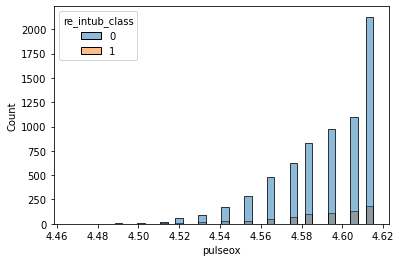

In [28]:
sns.histplot(df_to_model, x = 'pulseox', hue = 're_intub_class', bins = 40)

#### Create new feature: 'tidal-weight' which is tidal volume normalized to the weight of the person (a smaller person requires a smaller tidal volume to sustain blood oxygen than a larger person)

In [29]:
df_to_model['tidal_weight'] = df_to_model['tidalvolume']/ df_to_model['weight']

In [30]:
df_to_model.to_feather('../data/processed/df_to_model_labs')